In [ ]:
#hide
!pip install -Uqq fastbook

     |████████████████████████████████| 727kB 6.8MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 194kB 49.1MB/s 
     |████████████████████████████████| 1.2MB 35.2MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
     |████████████████████████████████| 12.8MB 241kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.


In [25]:
from pathlib import Path

In [30]:

import fastbook
from fastai.vision.widgets import *
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

In [33]:
# Get all folders
path = Path('gdrive/MyDrive/datatsets')
[x for x in p.iterdir() if x.is_dir()]

[Path('gdrive/MyDrive/datatsets/elephant'),
 Path('gdrive/MyDrive/datatsets/bat'),
 Path('gdrive/MyDrive/datatsets/rabbit')]

In [32]:
animals = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items= get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [34]:
dls = animals.dataloaders(path)

In [40]:
dls.valid.show_batch(max_n=64, nrows=3)

Output hidden; open in https://colab.research.google.com to view.

In [36]:
animals = animals.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [37]:
dls = animals.dataloaders(path)

In [38]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4) 

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


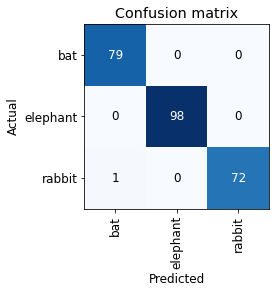

In [42]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

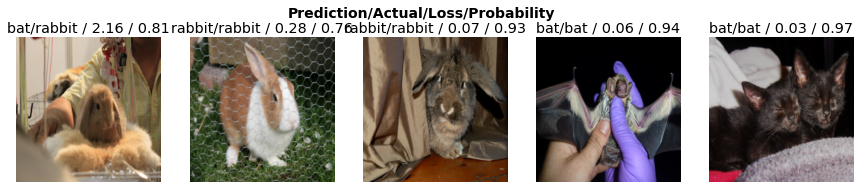

In [43]:
interp.plot_top_losses(5, nrows=1)

In [44]:
cleaner = ImageClassifierCleaner(learn)
cleaner